# Statistical Experiments and Significance Testing
![](https://affiliatemarketingvietnam.com/wp-content/uploads/2019/08/ab-testing.png)

# A/B Testing
* An **A/B test** is an experiment with **two groups** to establish which of two treatments, products, procedures, or the like is **superior**. Often one of the two treatments is the standard existing treatment, or no treatment. If a standard (or no) treatment is used, it is called the **control**. A typical hypothesis is that treatment is better than control.
![](images/psds_03in01.png)
* A/B tests are common in web design and marketing, since results are so readily measured. Some examples of A/B testing include:
    * Testing two soil treatments to determine which produces better seed germination
    * Testing two therapies to determine which suppresses cancer more effectively
    * Testing two prices to determine which yields more net profit
    * Testing two web headlines to determine which produces more clicks (Figure 3-2)
    * Testing two web ads to determine which generates more conversions
* You also need to pay attention to the test statistic or metric you use to compare group A to group B. Perhaps the most common metric in data science is a binary variable: click or no-click, buy or don’t buy, fraud or no fraud, and so on. The metric can also be a continuous variable (purchase amount, profit, etc.), or a count (e.g., days in hospital, pages visited) you are interested not in conversion, but in revenue per page view.

# Hypothesis Tests / Significance Tests
* Purpose: help you learn whether random chance might be responsible for an observed effect.
* Null hypothesis: The hypothesis that chance is to blame.
* Alternative hypothesis: Counterpoint to the null (what you hope to prove).
* One-way test: Hypothesis test that counts chance results only in one direction.
* Two-way test: Hypothesis test that counts chance results in two directions.
![](https://statisticsguruonline.com/wp-content/uploads/2019/01/hypothesis-testing-steps.png)

# Hypothesis Tests / Significance Tests
* In a properly designed A/B test, you collect data on treatments A and B in such a way that any observed difference between A and B must be due to either:
    * Random chance in assignment of subjects
    * A true difference between A and B
* A statistical hypothesis test is further analysis of an A/B test, or any randomized experiment, to assess whether random chance is a reasonable explanation for the observed difference between groups A and B.
![](images/psds_03in01.png)

# Hypothesis Tests / Significance Tests
## Null Hypothesis vs Alternative Hypothesis
![](https://365datascience.com/wp-content/uploads/2018/11/image11-1.jpg)

# Hypothesis Tests / Significance Tests
## Null Hypothesis vs Alternative Hypothesis
* Hypothesis tests by their nature involve not just a null hypothesis, but also an offsetting alternative hypothesis. Here are some examples:
    * Null = “no difference between the means of group A and group B,”, alternative = “A is different from B” (could be bigger or smaller)
    * Null = “A ≤ B,”, alternative = “A > B”
    * Null = “B is not X% greater than A,”, alternative = “B is X% greater than A”
* Taken together, the null and alternative hypotheses must account for all possibilities. The nature of the null hypothesis determines the structure of the hypothesis test.

## One-Way, Two-Way Hypothesis Test
![](https://saylordotorg.github.io/text_introductory-statistics/section_12/ecf5f771ca148089665859c88d8679df.jpg)

# Resampling
* **Resampling** in statistics means to repeatedly sample values from observed data, with a general goal of assessing random variability in a statistic. It can also be used to assess and improve the accuracy of some machine-learning models (e.g., the predictions from decision tree models built on multiple bootstrapped data sets can be averaged in a process known as bagging: “Bagging and the Random Forest”).
* There are two main types of resampling procedures: The bootstrap and permutation tests. 
    * The bootstrap is used to assess the reliability of an estimate. 
    * Permutation tests are used to test hypotheses, typically involving two or more groups.

![](https://miro.medium.com/max/864/1*MvvgAbmv2x1gJ3177mg9Cw.png)

# Resampling
## Permutation Test - “one size fits all” approach to inference
* In a **permutation** procedure, two or more samples are involved, typically the groups in an A/B or other hypothesis test. 
* **Permute** means to change the order of a set of values. 
* The first step in a permutation test of a hypothesis is to combine the results from groups A and B (and, if used, C, D, …) together. 
* This is the logical embodiment of the null hypothesis that the treatments to which the groups were exposed do not differ. 
* We then test that hypothesis by randomly drawing groups from this combined set, and seeing how much they differ from one another. The permutation procedure is as follows:
    * Combine the results from the different groups in a single data set.
    * Shuffle the combined data, then randomly draw (without replacing) a resample of the same size as group A.
    * From the remaining data, randomly draw (without replacing) a resample of the same size as group B.
    * Do the same for groups C, D, and so on.
    * Whatever statistic or estimate was calculated for the original samples (e.g., difference in group proportions), calculate it now for the resamples, and record; this constitutes one permutation iteration.
    * Repeat the previous steps R times to yield a permutation distribution of the test statistic.
* Now go back to the observed difference between groups and compare it to the set of permuted differences. If the observed difference lies well within the set of permuted differences, then we have not proven anything—the observed difference is within the range of what chance might produce. However, if the observed difference lies outside most of the permutation distribution, then we conclude that chance is not responsible. In technical terms, the difference is **statistically significant**.

In [1]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')
import random

In [2]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [3]:
index_name = 'species'
index_val1 = 'setosa'
index_val2 = 'versicolor'
index_val3 = 'virginica'
data_name = 'petal_width'
iris = sns.load_dataset('iris').set_index(index_name)
iris

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.1,3.5,1.4,0.2
setosa,4.9,3.0,1.4,0.2
setosa,4.7,3.2,1.3,0.2
setosa,4.6,3.1,1.5,0.2
setosa,5.0,3.6,1.4,0.2
...,...,...,...,...
virginica,6.7,3.0,5.2,2.3
virginica,6.3,2.5,5.0,1.9
virginica,6.5,3.0,5.2,2.0


In [4]:
set(iris.index)

{'setosa', 'versicolor', 'virginica'}

In [5]:
iris.loc[[index_val1,index_val2]][data_name]

species
setosa        0.2
setosa        0.2
setosa        0.2
setosa        0.2
setosa        0.2
             ... 
versicolor    1.2
versicolor    1.3
versicolor    1.3
versicolor    1.1
versicolor    1.3
Name: petal_width, Length: 100, dtype: float64

In [6]:
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[idx_A].mean() - x.loc[idx_B].mean()

def get_val(df,index_val1,index_val2,data_name):
    return perm_fun(df.loc[[index_val1,index_val2]][data_name].reset_index(drop=True), 
                                                 len(df.loc[[index_val1]][data_name]), 
                                                 len(df.loc[[index_val2]][data_name]))

In [7]:
mean_dif = iris.loc[[index_val1]][data_name].mean() - iris.loc[[index_val2]][data_name].mean()
print(mean_dif, get_val(iris,index_val1,index_val2,data_name))

-1.0799999999999998 -0.11999999999999977


<IPython.core.display.Javascript object>


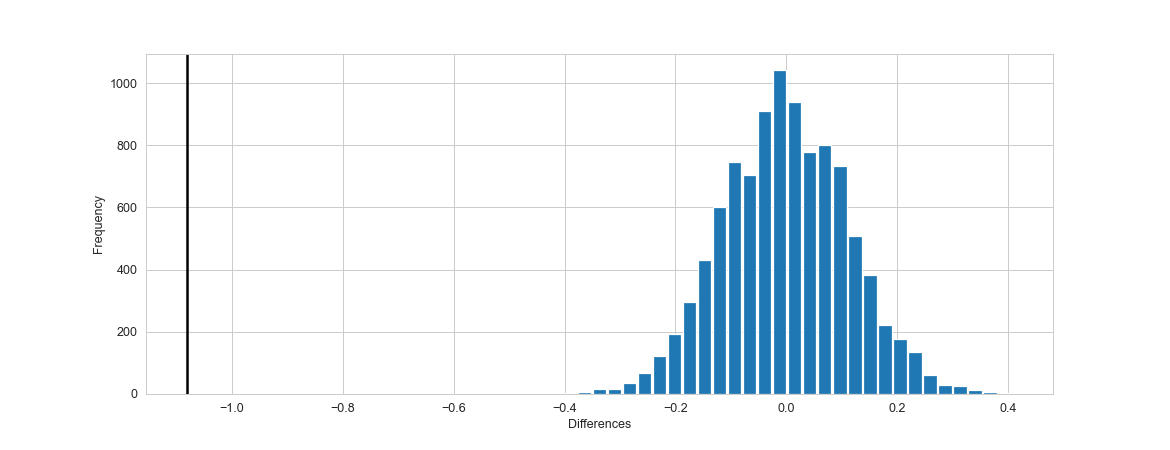

Text(0, 0.5, 'Frequency')

In [8]:
perm_diffs = [get_val(iris,index_val1,index_val2,data_name) for _ in range(10000)]
fig, ax = plt.subplots(figsize=(13, 5))
ax.hist(perm_diffs, bins=31, rwidth=0.9)
ax.axvline(x = mean_dif, color='black', lw=2)
ax.set_xlabel('Differences')
ax.set_ylabel('Frequency')

In [9]:
scipy.stats.ttest_1samp(perm_diffs, mean_dif)

Ttest_1sampResult(statistic=963.6348195481876, pvalue=0.0)

# Statistical Significance and P-Values
* **Statistical significance** is how statisticians measure whether an experiment (or even a study of existing data) yields a result more extreme than what chance might produce. If the result is beyond the realm of chance variation, it is said to be **statistically significant**.
* **P-value**: Given a chance model that embodies the null hypothesis, the p-value is the probability of obtaining results as unusual or extreme as the observed results.
* **Alpha**: The probability threshold of “unusualness” that chance results must surpass, for actual outcomes to be deemed statistically significant.
* **Type 1 error**: Mistakenly concluding an effect is real (when it is due to chance).
* **Type 2 error**: Mistakenly concluding an effect is due to chance (when it is real).

![](https://i.stack.imgur.com/idDTA.png)

# t-test
![](https://luanvan2s.com/files/assets/t_test_la_gi_luanvan2s.jpg)

In [10]:
print(iris.loc[[index_val1]][data_name].mean(),iris.loc[[index_val2]][data_name].mean())

0.2459999999999999 1.3259999999999998


<IPython.core.display.Javascript object>


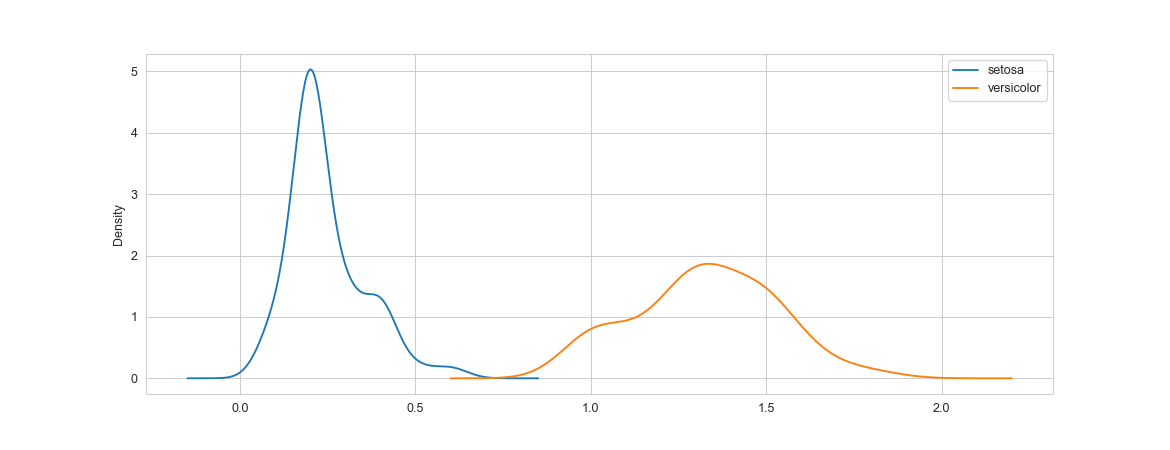

In [11]:
fig, ax = plt.subplots(figsize=(13, 5))
iris.loc[[index_val1,index_val2]][data_name].groupby(index_name).plot.kde()
plt.legend();

In [12]:
p_value = np.mean([diff < mean_dif for diff in perm_diffs])
p_value

0.0

In [13]:
res = scipy.stats.ttest_ind(iris.loc[[index_val1]][data_name],
                      iris.loc[[index_val2]][data_name],
                      equal_var=False)
print(f'p-value for t-test: {res.pvalue / 2:.4f}')

p-value for t-test: 0.0000


In [14]:
res = scipy.stats.ttest_ind(iris.loc[[index_val1]][data_name],
                      iris.loc[[index_val2]][data_name],
                      equal_var=True)
print(f'p-value for t-test: {res.pvalue / 2:.4f}')

p-value for t-test: 0.0000


In [15]:
scipy.stats.ttest_1samp(perm_diffs, mean_dif)  

Ttest_1sampResult(statistic=963.6348195481876, pvalue=0.0)

# ANOVA
![](https://www.questionpro.com/blog/wp-content/uploads/2016/03/rsz_anova.jpg)

<IPython.core.display.Javascript object>


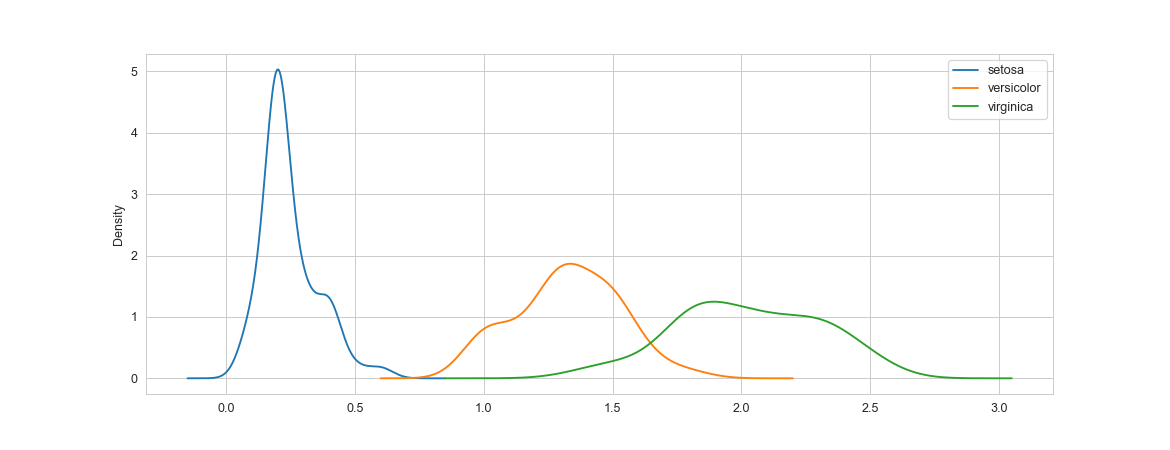

In [16]:
fig, ax = plt.subplots(figsize=(13, 5))
iris.loc[[index_val1,index_val2,index_val3]][data_name].groupby(index_name).plot.kde()
plt.legend();

# ANOVA - Permutation Approach
* Resampling procedure (specified here for the A-B-C-D test of 4 groups):
    * Combine all the data together in a single box
    * Shuffle and draw out four resamples of nA, nB, nC, nD values
    * Record the mean of each of the four groups
    * Record the variance among the four group means
    * Repeat steps 2–4 many times (say 1,000)
* What proportion of the time did the resampled variance exceed the observed variance? This is the p-value.
![](https://www.datanovia.com/en/wp-content/uploads/dn-tutorials/r-statistics-2-comparing-groups-means/images/one-way-anova-basics.png)

In [17]:
observed_variance = iris[data_name].groupby(index_name).mean().var()
print('Observed means:', iris[data_name].groupby(index_name).mean().values.ravel())
print('Variance:', observed_variance)

def perm_test(df):
    df = df.copy()
    df.index = np.random.permutation(df.index.values)
    return df.groupby(level=0).mean().var()

perm_variance = [perm_test(iris[data_name]) for _ in range(3000)]
print('Pr(Prob)', np.mean([var > observed_variance for var in perm_variance]))

Observed means: [0.246 1.326 2.026]
Variance: 0.8041333333333333
Pr(Prob) 0.0


<IPython.core.display.Javascript object>


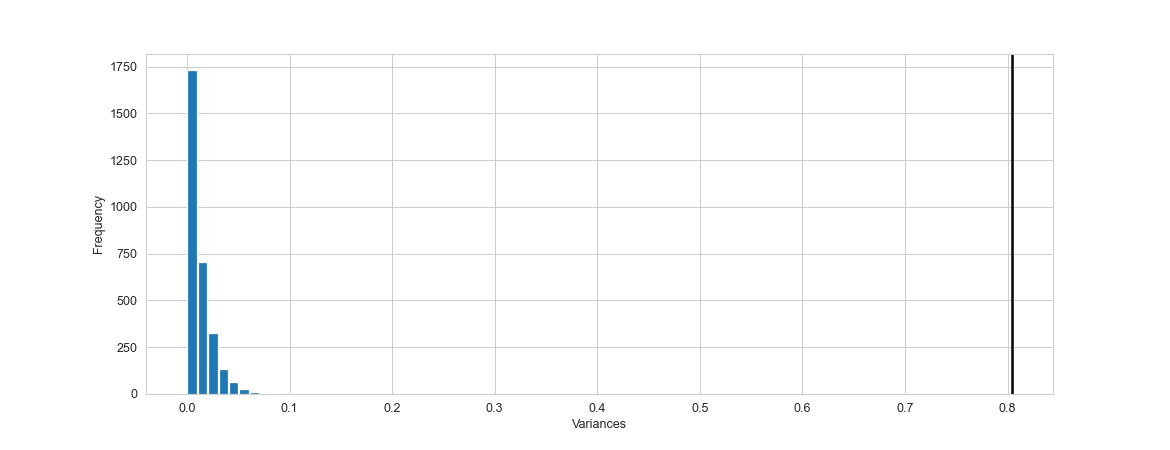

Text(0, 0.5, 'Frequency')

In [18]:
fig, ax = plt.subplots(figsize=(13, 5))
ax.hist(perm_variance, bins=11, rwidth=0.9)
ax.axvline(x = observed_variance, color='black', lw=2)
ax.set_xlabel('Variances')
ax.set_ylabel('Frequency')

In [19]:
scipy.stats.f_oneway(iris.loc[index_val1][data_name],
                    iris.loc[index_val2][data_name],
                    iris.loc[index_val3][data_name])

F_onewayResult(statistic=960.007146801809, pvalue=4.169445839443116e-85)

# Linear Regression
![](https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-multiple-regression/fitting-multiple-regression-model/_jcr_content/par/styledcontainer_2069/par/lightbox_4130/lightboxImage.img.png/1548702778023.png)

In [20]:
from statsmodels.formula.api import ols

<IPython.core.display.Javascript object>


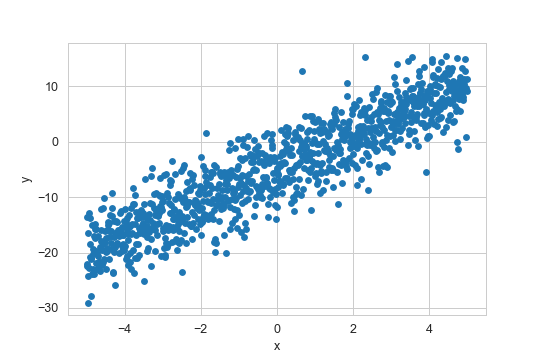

In [21]:
x = np.linspace(-5, 5, 1000)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})
# scatter plot of the data
data.plot.scatter(x='x', y='y')

In [22]:
model = ols("y ~ x", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     4794.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):               0.00
Time:                        20:26:55   Log-Likelihood:                -2785.9
No. Observations:                1000   AIC:                             5576.
Df Residuals:                     998   BIC:                             5586.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.8448      0.124    -39.010      0.0

In [23]:
model = ols('sepal_width ~ petal_length + petal_width', iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.213
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     19.90
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           2.24e-08
Time:                        20:26:55   Log-Likelihood:                -69.802
No. Observations:                 150   AIC:                             145.6
Df Residuals:                     147   BIC:                             154.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.5870      0.094     38.272   

In [24]:
model = ols('petal_width ~ petal_length', iris).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            petal_width   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1882.
Date:                Mon, 10 Aug 2020   Prob (F-statistic):           4.68e-86
Time:                        20:26:55   Log-Likelihood:                 24.796
No. Observations:                 150   AIC:                            -45.59
Df Residuals:                     148   BIC:                            -39.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.3631      0.040     -9.131   

<IPython.core.display.Javascript object>


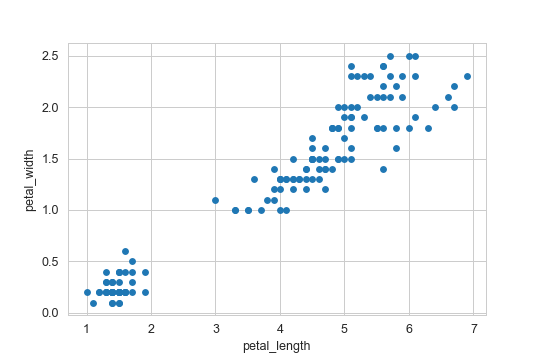

In [25]:
iris.plot.scatter(x='petal_length', y='petal_width')